# Modelo 2
-----
## Modelo basado en técnicas de detección de outliers
Utilizaremos técnicas de detección de outliers, en este caso utilizaremos el Isolation Forest de SciKit-Learn.

La entrada de este modelo será el dataset 'prepared' con los datos ya preparados para su consumición.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("../prep/prepared.csv")
df = df.drop(columns=['Unnamed: 0']).dropna()
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0,-9839.64,0.00,-0.057496,0.000010
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0,-1864.28,0.00,-0.083791,0.000010
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,-181.00,0.00,-0.153251,0.000010
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0,-181.00,-21182.00,-0.153251,-0.954918
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0,-11668.14,0.00,-0.274196,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0,-339682.13,339682.13,-0.997065,339.682140
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1,-6311409.28,0.00,-0.999842,0.000010
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0,-6311409.28,6311409.27,-0.999842,90.826229
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1,-850002.52,0.00,-0.998825,0.000010


In [3]:
train, test = train_test_split(df)
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4771965, 16)
Number transactions y_train dataset:  (4771965,)
Number transactions X_test dataset:  (1590655, 16)
Number transactions y_test dataset:  (1590655,)


In [4]:
from joblib import load
model = load('../random_forest_sm_final.joblib')

In [5]:
predictions_resampled = model.predict(X_test)

Confusion Matrix - Random Forest
[[1588487     106]
 [    330    1732]]


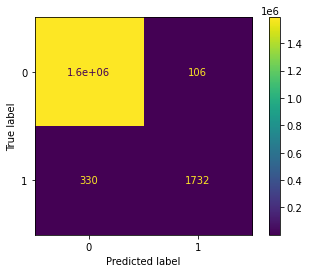

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cm_resampled = confusion_matrix(y_test, predictions_resampled .round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
disp = ConfusionMatrixDisplay(cm_resampled)
disp.plot()

## Definición del modelo

In [37]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',    PCA(n_components=6)),
    ('iso',    IsolationForest(n_estimators=1000))
])

In [13]:
model.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('iso', IsolationForest(n_estimators=1000))])

In [20]:
train_df = X_train
train_df['true'] = y_train

train_df = train_df.sample(500000)

In [22]:
train_df_true    = train_df.pop('true')
train_df['pred'] = model.predict(train_df)
train_df['true'] = train_df_true

In [26]:
train_df['pred'] = train_df['pred'].apply(lambda x: 0 if x==1 else 1)

## Classification Metrics

In [30]:
cm = confusion_matrix(train_df['true'],train_df['pred'])

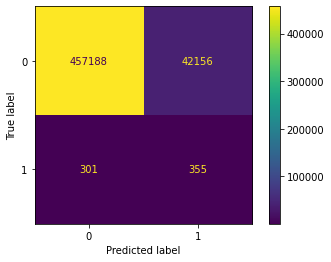

In [33]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [35]:
print(classification_report(train_df['true'],train_df['pred']))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    499344
           1       0.01      0.54      0.02       656

    accuracy                           0.92    500000
   macro avg       0.50      0.73      0.49    500000
weighted avg       1.00      0.92      0.95    500000



### No es el mejor modelo:
Precisión: 50%

Recall:    73%

F1 score:  49%